# Device Webpages

We can get each device's homepage from IoTList and try to get some categories that way.

In [1]:
import pickle
with open('amazon_search_results_no-ignore.pickle', 'rb') as f:
    amzn = pickle.load(f)

In [2]:
# Get the editorial review for each object
from bs4 import BeautifulSoup

def strip_html(html):
    text = BeautifulSoup(html).get_text(separator='. ')
    text = text.replace('Product Description', '')
    text = text.replace('.0', '')
    return text+'.'

def get_ed_review(xml):
    html = BeautifulSoup(xml, 'xml').find('EditorialReview').text
    return strip_html(html)#utils.process_html(html)

ed_revs = []
for k,v in amzn.items():
    try:
        ed_revs.insert(0, (k, get_ed_review(v)))
    except Exception as e:
        print('nope')

/home/trevor/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/trevor/miniconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope
nope


In [3]:
# TODO: some summaries (Google home) have multiple sentences, but still
# don't produce any summaries. Why?

import re
import gensim

SUMMARY_LENGTHS = [50, 100, 200, 'FULL']

all_summaries = {k: [] for k in SUMMARY_LENGTHS}

for length, summaries in all_summaries.items():
    for t in ed_revs:
        try:
            if not length == 'FULL':
                summary = gensim.summarization.summarize(
                    t[1], 
                    word_count=length)
            if (length=='FULL' and t[0]) or summary:
                summaries.insert(0, (t[0], (t[1] if length=='FULL' else summary)))
        except ValueError as e:
            print(length, t[0], e)

50 tado°:  The connected heating system  input must have more than one sentence
50 Staples Connect:  Home automation platform input must have more than one sentence
50 Viper:  Home Security Starter Kit input must have more than one sentence
50 UP 24:  Tracking a healthy lifestyle input must have more than one sentence
50 Goldee:  Smart light controller input must have more than one sentence
50 WeMo Light Switch:  Control your lights from anywhere  input must have more than one sentence
50 Lockitron:  make your deadbolt wirelessly controlled input must have more than one sentence
50 Logitech Harmony Ultimate:  Connected entertainment hub  input must have more than one sentence
50 Nest Protect:  Smart Smoke and Carbon Monoxide (CO) Alarm input must have more than one sentence
50 Withings:  Smart baby monitor input must have more than one sentence
50 W/ME:  Health wristband input must have more than one sentence
50 Withings:  Smart kid scale input must have more than one sentence
50 Samsu

In [32]:
import utils

p_s = {k: [(n, utils.process_html(s)) for n, s in summaries] 
       for k, summaries in all_summaries.items()}

/home/trevor/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/trevor/miniconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [33]:
flat_er_sums = {k: [] for k in SUMMARY_LENGTHS}
for length, summaries in p_s.items():
    for e in summaries:
        for r in e[1]:
            flat_er_sums[length].insert(0, (e[0], r))

In [6]:
import gensim

NUM_TOPICS = 15

# Perform LDA
all_lda = {}
all_dictionaries = {}
for k, er_sums in flat_er_sums.items():
    all_dictionaries[k] = gensim.corpora.Dictionary([e[1] for e in er_sums])
    corpus = [all_dictionaries[k].doc2bow(s[1]) 
              for s in flat_er_sums[k]]
    all_lda[k] = gensim.models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS)

In [7]:
for k, lda in all_lda.items():
    print('Summary length = {}'.format(k))
    print()
    for i in range(NUM_TOPICS):
        print('Topic: {}'.format(i))
        print(', '.join([all_dictionaries[k].get(term) for term,_ in lda.get_topic_terms(i)]))
        print()
    print('\n\n\n')

Summary length = 50

Topic: 0
watch, batteri, capac, keep, air, hero, view, well, featur, button

Topic: 1
connect, home, can, devic, smart, turn, kit, ring, world, design

Topic: 2
control, day, sound, allow, power, can, connect, music, show, light

Topic: 3
tv, power, batteri, 3, support, watch, two, hd, bass, wireless

Topic: 4
activ, deliv, devic, track, motion, time, jbl, sleep, sensor, connect

Topic: 5
oil, secur, x, home, support, system, window, pair, make, speaker

Topic: 6
featur, can, fit, devic, design, camera, directli, attach, clip, set

Topic: 7
can, time, input, voltag, power, output, tv, devic, specif, light

Topic: 8
door, sleep, usb, qualiti, 3, even, home, made, includ, interfac

Topic: 9
video, can, clear, alert, sound, keep, cabl, design, superior, stream

Topic: 10
make, app, one, camera, item, home, color, enabl, will, alexa

Topic: 11
qualiti, power, list, technolog, design, home, brand, new, babi, wigwag

Topic: 12
design, offer, mount, can, tilt, qualiti, ho

In [151]:
# TF-IDF (from "Document Clustering with Python")
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet as wn
import spacy
import nltk

parser = spacy.en.English()
en_stop = set(nltk.corpus.stopwords.words('english'))

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    elif wn.synsets(lemma, pos=wn.NOUN): 
        return lemma
    else:
        return None

def prepare_text_for_tfidf(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens if get_lemma(token)]
    return tokens

tfidf_vectorizers = {k: TfidfVectorizer(max_df=0.7, max_features=200000,
                                   min_df=0.000, stop_words='english',
                                   use_idf=True, tokenizer=prepare_text_for_tfidf,
                                   ngram_range=(1,1), sublinear_tf=False)
                     for k in SUMMARY_LENGTHS}

tfidf_matrices = {k: tfidf_vectorizers[k].fit_transform([w[1] 
                                                         for w in v]).toarray() 
                  for k,v in all_summaries.items()}

In [152]:
feature_names = {k: tf.get_feature_names() 
                       for k,tf in tfidf_vectorizers.items()}

feature_indices = {k: {doc: tfidf_matrices[k][doc,:].nonzero()[0] 
                             for doc in range(tfidf_matrices[k].shape[0])}
                         for k in SUMMARY_LENGTHS}

tfidf_scores = {k: {doc: zip(ft_ind, [tfidf_matrices[k][doc,x] 
                                      for x in ft_ind])
                    for doc, ft_ind in feature_indices[k].items()}
                for k in SUMMARY_LENGTHS}

In [165]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import pandas as pd

MAX_WORDS = 200
NUM_CLUSTERS = 92

# Clustering algorithm
# K-Means
km = KMeans(n_clusters=NUM_CLUSTERS)
km.fit(tfidf_matrices[MAX_WORDS])
clusters = km.labels_.tolist()
#DBSCAN
#db = DBSCAN(eps=1, min_samples=5)
#db.fit(tfidf_matrices[MAX_WORDS])
#clusters = db.labels_.tolist()
# Spectral clustering
#sc = SpectralClustering(n_clusters=NUM_CLUSTERS)
#sc.fit(tfidf_matrices[MAX_WORDS])
#clusters = sc.labels_.tolist()

# Reduce to 2 dimensions
# PCA
#pca = PCA(n_components=2)
#pca.fit(tfidf_matrices[MAX_WORDS])
#MDS
#mds = MDS(n_components=2, random_state=1)
#mds_pos = mds.fit_transform(tfidf_matrices[MAX_WORDS])
#xs, ys = mds_pos[:, 0], mds_pos[:, 1]
#T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=1)
tsne_pos = tsne.fit_transform(tfidf_matrices[MAX_WORDS])
xs, ys = tsne_pos[:, 0], tsne_pos[:, 1]

pre_df = list(zip([name for name,_ in all_summaries[MAX_WORDS]], 
                      xs, ys, clusters))
df = pd.DataFrame(pre_df)
df.columns = ['name', 'x', 'y', 'category']

In [166]:
from sklearn import metrics
import pandas as pd

label_truth = []
label_cluster = []

label_df = pd.read_csv('iotlist-classifications.csv')
label_df['label_factor'] = pd.factorize(label_df['label'])[0]
for i, row in df.iterrows():
    truth = label_df[label_df['device_name']+': '+label_df['short_desc']==row['name']]['label_factor'].iloc[0]
    label_truth.insert(0, truth)
    label_cluster.insert(0, row['category'])
    
metrics.adjusted_rand_score(label_truth, label_cluster)

0.13734253968647503

In [26]:
### IF YOU RUN THIS CELL, RE-RUN THE ONE ABOVE IT BEFORE RUNNING ###
### OTHER CELLS. The zip will be exhausted after this.           ###

# Nest camera
MAX_WORDS = 100
for i in range(5):
    s = sorted(tfidf_scores[MAX_WORDS][i], key=lambda x: x[1], reverse=True)
    fts = {ft[0]: ft[1] for ft in feature_names.items()}
    print(all_summaries[MAX_WORDS][i][0])
    [print('{:.<20}{:.3f}'.format(fts[MAX_WORDS][j], v)) for j,v in s]
    print()

Nest Thermostat:  E
learning thermostat.0.308
learning............0.267
thermostat..........0.246
carbon..............0.200
carbon monoxide.....0.200
monoxide............0.200
protect.............0.140
average heating.....0.118
common source.......0.118
cooling learning....0.118
dangerous...........0.118
dangerous carbon....0.118
detect dangerous....0.118
energy independent..0.118
furnace.............0.118
furnace common......0.118
generation learning.0.118
independent.........0.118
independent study...0.118
leak................0.118
monoxide leak.......0.118
monoxide learning...0.118
program prove.......0.118
protect detect......0.118
protect protect.....0.118
prove energy........0.118
rings sharp.........0.118
save average........0.118
sharp display.......0.118
source carbon.......0.118
study...............0.118
study thermostat....0.118
style learning......0.118
thermostat furnace..0.118
thermostat program..0.118
thermostat rings....0.118
thermostat save.....0.118
thermostat style..

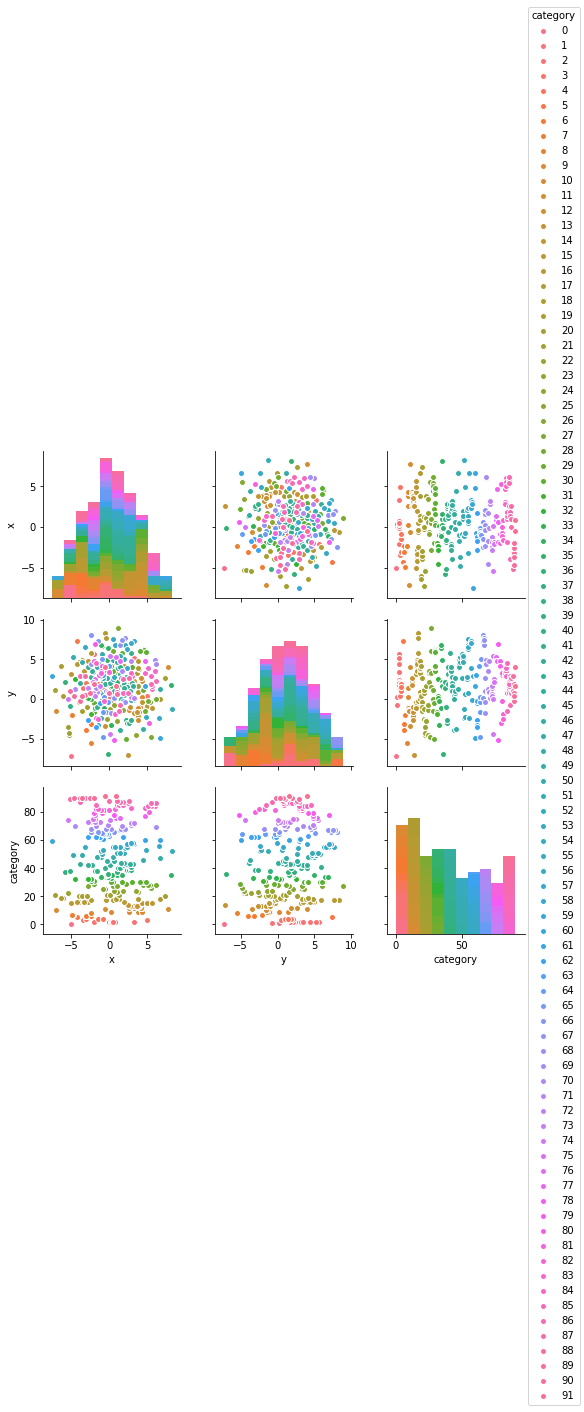

In [9]:
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 15))

sb.pairplot(data=df, hue='category')

In [10]:
for group in df.groupby('category', as_index=False):
    print('Category {}:'.format(group[0]))
    for name in group[1]['name']:
        print(name)
    print()
    print('================================================')
    print()

Category 0:
OpenSprinkler:  Automate your sprinklers
Skydrop:  Revolutionary sprinkler controller 
Hydrawise:  WiFi Irrigation Controller with predictive watering
Edyn:  Welcome to the connected garden
PlantLink:  Listen to your plants
Rachio:  Smart sprinkler controller


Category 1:
Eero:  Wifi system for your home 
Hammerhead One:  Navigation for bike riders


Category 2:
Bluesmart:  Connected carry-On
Iota:  GPS tracker and motion sensor
The Q:   Smart home audio and lighting platform
The Rufus Cuff:  A wrist communicator
Soap:  Home automation router with touch
Kapture:  Audio-recording wristband
PENCIL:  Bluetooth stylus 
Spotter:  The Multipurpose Sensor
REVOLV:  Smart Home Automation Platform 
GLASS:  Connected glasses from Google 


Category 3:
iBaby Monitor:  Digital video monitor with night vision 
Goji Play:  Turn your cardio workout into a interactive game  


Category 4:
Skully:  Connected Motorcycle Helmet
Neuma:  Measure and manage the autonomic brain
Goji:  Smart lock


In [23]:
df

,name,x,y,category
0,Amazon Echo Spot: Smart alarm clock,-3.497540,-1.510086,20
1,Amazon Echo: 2nd generation,-3.540004,-1.503247,20
2,Nest Thermostat: E,-6.359838,4.187104,19
3,August: Smart Lock 3rd generation,-0.137151,-6.986935,36
4,HomePod: Smart speaker with Siri,-0.589486,1.857599,40
5,Amazon Echo Show: Alexa with a screen,-3.524791,-1.527354,20
6,Amazon Echo Look: Alexa powered camera,0.487325,7.603158,55
7,Awair Glow: Smart plug that tracks air quality,-4.256609,7.364589,5
8,TP-Link: Multicolor smart wi-fi,-7.497189,2.900769,59
9,Wemo Mini: Wifi smart plug,-2.372992,-5.525700,8
